In [19]:
import pandas as pd
import numpy as np
import collections
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import pickle

## Load the data in and observe the head

In [2]:
X= np.load('dev_set_text')
Y = np.load('dev_set_labels')
X_test = np.load('hold_set_text')
Y_test = np.load('hold_set_labels')

In [3]:
print(X.shape)
print(Y.shape)

(627416,)
(627416, 15)


In [46]:
tfid_vect = TfidfVectorizer(min_df=0.0001, stop_words='english', ngram_range=(1,3))

In [47]:
X_vect = tfid_vect.fit_transform(X,Y)

In [48]:
tfid_vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0001,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [49]:
vect_pkl_filename = 'Tfidf_vect_trigrams.pkl'
# Open the file to save as pkl file
vect_model_pkl = open(vect_pkl_filename, 'wb')
pickle.dump(tfid_vect, vect_model_pkl)
# Close the pickle instances
vect_model_pkl.close()

### TFIDF MODEL PICKLED 

In [11]:
vect_model_pkl = open(vect_pkl_filename, 'rb')
tfid_vect_model = pickle.load(vect_model_pkl)
print("Loaded Vect tree model :: ", tfid_vect_model)

Loaded Vect tree model ::  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [15]:
#SVC

In [12]:
X_transformed = tfid_vect_model.transform(X)
SVC_classifier = OneVsRestClassifier(LinearSVC())
SVC_classifier.fit(X_transformed, Y)
    

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [13]:
X_test_mat = tfid_vect_model.transform(X_test)
predictions = SVC_classifier.predict(X_test_mat)



In [14]:
f1_score(Y_test, predictions, average='macro')

0.69818963702905046

In [23]:
print(classification_report(Y_test, predictions, target_names=['android', 'asp.net', 'c#', 'c++', 'css', 'html', 'ios', 'java',
       'javascript', 'jquery', 'mysql', 'objective-c', 'php', 'python',
       'sql']))


             precision    recall  f1-score   support

    android       0.96      0.84      0.90     17984
    asp.net       0.84      0.54      0.66      5888
         c#       0.80      0.50      0.62     19922
        c++       0.86      0.56      0.68      9440
        css       0.85      0.68      0.76      8541
       html       0.67      0.36      0.46     11820
        ios       0.86      0.65      0.74      9376
       java       0.90      0.62      0.74     22974
 javascript       0.83      0.59      0.69     24934
     jquery       0.88      0.64      0.74     15674
      mysql       0.88      0.64      0.74      8685
objective-c       0.68      0.32      0.43      5359
        php       0.93      0.73      0.82     20007
     python       0.97      0.76      0.85     13114
        sql       0.75      0.56      0.64      7175

avg / total       0.86      0.62      0.72    200893



In [ ]:
def build_classification_model(count_vectorizer, model):
    vect_pkl_filename = 'Tfidf_vect_trigrams.pkl'
    X= np.load('dev_set_text')
    Y = np.load('dev_set_labels')
    

    

In [45]:
#trying this out with the bigram method
bigram_tfid = TfidfVectorizer(min_df=0.0001, stop_words='english', ngram_range=(1,3))
X_bigram_vec = bigram_tfid.fit_transform(X,Y)
X_bigram_transform = bigram_tfid.transform(X)

SVC_classifier = OneVsRestClassifier(LinearSVC())
SVC_classifier.fit(X_bigram_transform, Y)

X_test_bigram = bigram_tfid.transform(X_test)
prediction_bigram = SVC_classifier.predict(X_test_bigram)

print(f1_score(Y_test, prediction_bigram, average='macro'))

0.731728843387


In [34]:
data.iloc[5]

Id                                                   1010
Text    How to get the value of built, encoded ViewSta...
Tag                                         [c#, asp.net]
Name: 5, dtype: object

In [35]:
def clean_text(raw_text):
    soup = BeautifulSoup(raw_text, 'html.parser')
    [s.extract() for s in soup('code')]
    return(str(soup.get_text()))

In [40]:
def clean_html_tags(raw_html):
    """
    Removes the code stuff and the html tags inside a post
    """
# #     code = re.compile('<code>.*?</code>')
#     sans_code = re.sub('<code>.*?</code>', '', raw_html)
#     print(sans_code)
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', raw_html)
    return (cleantext)

In [24]:
# type(clean_text(sample_text))

In [25]:
tags = '/Users/dentonzhao/Downloads/Tags.csv'
posts = '/Users/dentonzhao/Downloads/Questions.csv'

In [26]:
tag_df = pd.read_csv(tags, encoding='latin-1')

In [27]:
tag_df.head(3)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air


In [28]:
df= pd.read_csv(posts, encoding='latin-1')

In [29]:
df.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


## Need to merge the two dataframes together

In [32]:
data = pd.merge(df, tag_df, how='inner', on='Id')

In [33]:
data.shape

(3750994, 8)

In [34]:
print("There are {} unique tags".format(len(data['Tag'].unique())))

There are 37036 unique tags


##### Too many tags, Lets try to build a classifier for the top 15

In [35]:
top_15 = list(data['Tag'].value_counts()[:15].index)

relevant_posts = data[data['Tag'].isin(top_15)].reset_index()

In [36]:
relevant_posts.shape

(1004185, 9)

This will be primarily an NLP approach, lets worry only about the ID, Title, Body and Tag

In [37]:
relevant_posts = relevant_posts[['Id', 'Title', 'Body', 'Tag']]

In [38]:
relevant_posts.head(1)

,Id,Title,Body,Tag
0,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql


Zoom in on the tag distribution

In [39]:
tag_counts =relevant_posts['Tag'].value_counts()

In [40]:
tag_percentage = tag_counts/(tag_counts.sum())
tag_percentage

javascript     0.123638
java           0.114732
c#             0.100764
php            0.098396
android        0.090281
jquery         0.078215
python         0.064332
html           0.058730
c++            0.047393
ios            0.046813
mysql          0.042287
css            0.042132
sql            0.035633
asp.net        0.029845
objective-c    0.026810
Name: Tag, dtype: float64

In [50]:
#baseline f-1 score. predict 0 everytime:
tag_counts.sum()


1004185

''

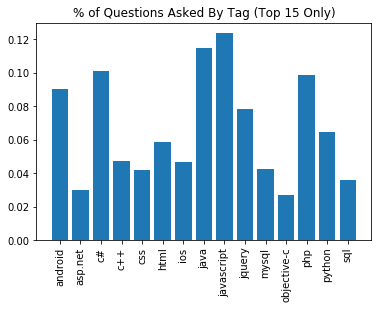

In [43]:
# tag_counts = relevant_posts['Tag'].value_counts()
plt.bar(tag_percentage.index, (tag_percentage.values))
plt.xticks(rotation=90)
plt.title('% of Questions Asked By Tag (Top 15 Only)')
;

Lets clean the text now. Combine the title & body, then strip away the html tags and the links

In [14]:
def clean_html_tags(post):
    """
    Removes the code stuff and the html tags inside a post
    """
    code = re.compile('<pre><code>.*?</code></pre>')
    sans_code = re.sub(code, ' ', post)
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sans_code)
    return(cleantext)

def remove_whitespaces(text):
    new_text = text.replace('"','').replace("\n","").replace("\t","")
    return(new_text)


In [15]:
relevant_posts['Text'] = relevant_posts['Title'] + " " + relevant_posts['Body']

In [16]:
relevant_posts['Text'] = relevant_posts['Text'].apply(clean_html_tags).str.lower()

In [17]:
relevant_posts['Text'] = relevant_posts['Text'].apply(remove_whitespaces)

In [18]:
relevant_posts = relevant_posts[['Id', 'Text', 'Tag']]

### Text is now clean, closer inspection on tags

In [31]:
#We are likely looking at a multi-label problem. Lets confirm
Id_counts = relevant_posts['Id'].value_counts()
num_multi_labels = len(Id_counts[Id_counts > 1])
fract = int(num_multi_labels/len(Id_counts) * 100)

print("There are {} ids with multiple tags. This is roughtly {}% of the data".format(num_multi_labels, fract))

NameError: name 'relevant_posts' is not defined

In [20]:
tag_dict = {}
for tag in top_15:
    tag_dict[tag] = len(tag_dict)
tag_dict

{'android': 4,
 'asp.net': 13,
 'c#': 2,
 'c++': 8,
 'css': 11,
 'html': 7,
 'ios': 9,
 'java': 1,
 'javascript': 0,
 'jquery': 5,
 'mysql': 10,
 'objective-c': 14,
 'php': 3,
 'python': 6,
 'sql': 12}

In [51]:
relevant_posts.head()

,Id,Title,Body,Tag
0,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql
1,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,asp.net
2,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
3,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
4,650,Automatically update version number,<p>I would like the version property of my app...,c#


In [22]:
relevant_posts = relevant_posts.groupby(['Id','Text'])['Tag'].apply(list).reset_index()

In [23]:
relevant_posts.head()

,Id,Text,Tag
0,120,asp.net site maps has anyone got experience c...,"[sql, asp.net]"
1,260,adding scripting functionality to .net applica...,[c#]
2,330,should i use nested classes in this case? i a...,[c++]
3,650,automatically update version number i would l...,[c#]
4,930,how do i connect to a database and loop over a...,[c#]


In [24]:
X = relevant_posts['Text'].values
y = relevant_posts['Tag'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [60]:
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(min_df=0.001, stop_words='english', ngram_range=(1,2))),
    ('clf', OneVsRestClassifier(SGDClassifier()))])


In [61]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_train)

In [62]:
classifier.fit(X_train, Y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_id...andom_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          n_jobs=1))])

In [63]:
# classifier.predict()

In [64]:
# Y = mlb.fit_transform(y_train)

In [65]:
# oneVsRest.fit(X_train_mat, Y)

In [66]:
predictions = classifier.predict(X_test)

In [67]:
Y_test = mlb.fit_transform(y_test)

In [68]:
accuracy_score(Y_test, predictions)

0.51824414211092273

In [73]:
mlb.classes_

array(['android', 'asp.net', 'c#', 'c++', 'css', 'html', 'ios', 'java',
       'javascript', 'jquery', 'mysql', 'objective-c', 'php', 'python',
       'sql'], dtype=object)

In [70]:
predictions[8]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### implementing cross validation to pipeline

In [90]:
def fit_evaluate_model(X_train, y_train, vectorizer, model, cv_folds):
    """
    Fit a model to text data and score the results via cv_validation
    
    INPUTS:
    X_train: np.array of input data
    y_train: np.array of input data
    vectorizer: sklearn text feature extraction model (TFID, CountVectorizer)
    model: sklearn model class to use. This will be wrapped around a OneVsRestClassifier
    cv_folds: number of models
    """
    #use sklearn Multibinarylabel to convert y_train data:
    mlb = MultiLabelBinarizer()
    Y_train = mlb.fit_transform(y_train)
    
    #make the pipeline
    classifier = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', OneVsRestClassifier(model))])
    
    seed=42
    kfold = KFold(n_splits=cv_folds, random_state=seed)
    
    results = cross_val_score(classifier, X_train, Y, cv=kfold, n_jobs=-1, scoring='f1_macro')
    print(results.mean())
    
    return(results)

    
    
    

In [ ]:
RF_results = fit_evaluate_model(X_train, 
                                y_train, 
                                TfidfVectorizer(min_df=0.001, stop_words='english', ngram_range=(1,2)),
                                RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight="balanced"),
                                2)

In [91]:
Logit_results = fit_evaluate_model(X_train, 
                                   y_train, 
                                   TfidfVectorizer(min_df=0.001, stop_words='english', ngram_range=(1,2)),
                                   LogisticRegression(solver="sag"),
                                   2)

0.742396453789


In [92]:
SVC = fit_evaluate_model(X_train,
                         y_train,
                         TfidfVectorizer(min_df=0.001, stop_words='english', ngram_range=(1,2)),
                         LinearSVC(),
                         2)


0.755516105993


In [ ]:
Naive_Bayes= fit_evaluate_model(X_train,
                         y_train,
                         TfidfVectorizer(min_df=0.001, stop_words='english', ngram_range=(1,2)),
                         MultinomialNB(fit_prior=True),
                         2)

0.662726153238


In [ ]:
GB

# Add stemming

In [ ]:
TfidfVectorizer()

In [64]:
X_test[5]

'how can i make the headline sticky as the table headers? i am trying to make sticky table headers. here is what i have so far as an example of what i need.here is the code i found from someone else.here you can see a demo of what i want to achieve jsfiddle'

In [65]:
Y_test[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [37]:
# def convert_tagid(tags, tag_dict):
#     tag_ids = []
#     for tag in tags:
#         tag_id = tag_dict[tag]
#         tag_ids.append(tag_id)
#     return(tag_ids)    
    

In [38]:
# y = [0 for x in range(10)]
# y[1,5]
# y

In [39]:
# def tag_to_vector(tag):
#     """Converts the tag elements to a vector of 1 and 0s."""
#     base_tag_vector = [0 for x in range(15)]
#     for index in tag:
#         base_tag_vector[index] = 1
#     return(base_tag_vector)

In [40]:
# relevant_posts['Tag'] = relevant_posts['Tag'].apply(convert_tagid, args=(tag_dict,))

In [41]:
# relevant_posts

In [42]:
# relevant_posts['Tag'] = relevant_posts['Tag'].apply(tag_to_vector)

In [43]:
# relevant_posts